# 1) Problem statement.

This dataset is the collection of Algerian Forest Fire incidents with records of around 4 months.

From this data obtain the sub-data of weather observation and take the output as Rain

like in what types of conditions are favourable for the Rain to happen.


# 2) Data Collection.

The Dataset is collected from UCI Mechine Learing Reposatory.

The dataset having 14 columns and 244 rows.

# Information of the AFF dataset is as below

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

Weather data observations

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8

FWI Components

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

**Importing Libraries**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from scipy.stats import chi2_contingency
%matplotlib inline

In [43]:
df_full = pd.read_csv(r'C:\Users\Jecky\Python Jecky\Dataset\Algerian_forest_fires_dataset_UPDATE.csv', header=1)
df_full.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [44]:
df_full.shape

(246, 14)

**The given data is for two different region and also given as same.**
**Need to make one single dataframe from that**

In [45]:
df_full.drop(labels=[122,123], axis=0, inplace=True)

**Giving the values to two region to two diferent**

In [46]:
df_full['Region']= 0
df_full['Region'][122:]= 1

C:\Users\Jecky\AppData\Local\Temp\ipykernel_17296\1290048584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['Region'][122:]= 1


In [47]:
df_full.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [48]:
df_full.columns=['DAY','MONTH','YEAR','TEMPERATURE','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','CLASSES','REGION']

In [49]:
df_full.loc[167]

DAY                 14
MONTH               07
YEAR              2012
TEMPERATURE         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
CLASSES            NaN
REGION               1
Name: 167, dtype: object

From the above, it is clear that we need to handle the values of row 167 carefully without loosing the row.

I think it has been shifted to the left as the typing mistake

In [50]:
df_full.at[167, 'DC']=14.6
df_full.at[167, 'ISI']=9
df_full.at[167, 'BUI']=12.5
df_full.at[167, 'FWI']=10.4

,REGION
REGION,1.0


Time to make subset from the wholeset

In [29]:
adf = df_full[['TEMPERATURE','RH','Ws','Rain']]

In [32]:
adf.isnull().sum()

TEMPERATURE    0
RH             0
Ws             0
Rain           0
dtype: int64

In [35]:
adf

,TEMPERATURE,RH,Ws,Rain
0,29,57,18,0
1,29,61,13,1.3
2,26,82,22,13.1
3,25,89,13,2.5
4,27,77,16,0
...,...,...,...,...
241,30,65,14,0
242,28,87,15,4.4
243,27,87,29,0.5
244,24,54,18,0.1


In [38]:
adf.dtypes

TEMPERATURE    object
RH             object
Ws             object
Rain           object
dtype: object

In [40]:
adf['TEMPERATURE'] = adf['TEMPERATURE'].astype(int)
adf['RH'] = adf['RH'].astype(int)
adf['Ws'] = adf['Ws'].astype(int)
adf['Rain'] = adf['Rain'].astype(float)

C:\Users\Jecky\AppData\Local\Temp\ipykernel_17296\1142860209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf['TEMPERATURE'] = adf['TEMPERATURE'].astype(int)
C:\Users\Jecky\AppData\Local\Temp\ipykernel_17296\1142860209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf['RH'] = adf['RH'].astype(int)
C:\Users\Jecky\AppData\Local\Temp\ipykernel_17296\1142860209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [41]:
## EDA
adf.corr()

,TEMPERATURE,RH,Ws,Rain
TEMPERATURE,1.000000,-0.654443,-0.278132,-0.326786
RH,-0.654443,1.000000,0.236084,0.222968
Ws,-0.278132,0.236084,1.000000,0.170169
Rain,-0.326786,0.222968,0.170169,1.000000


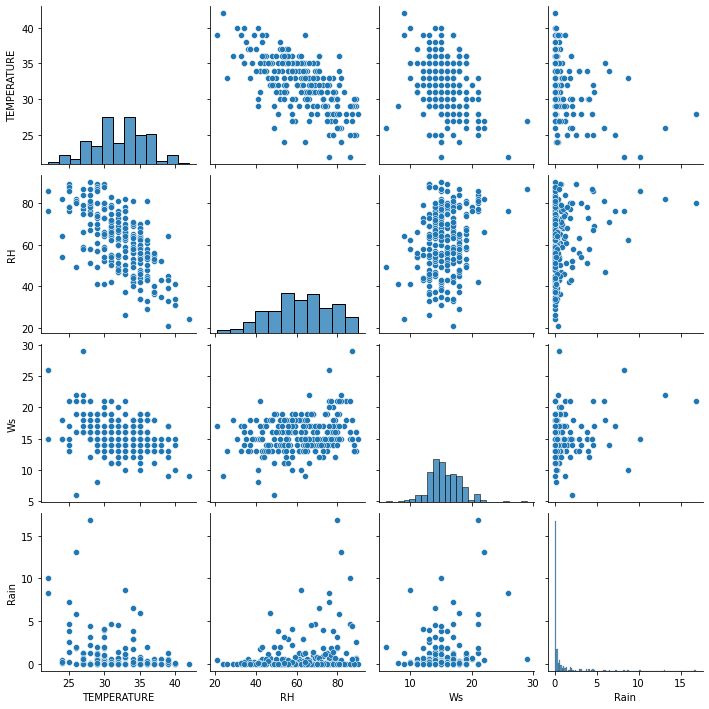

In [52]:
sns.pairplot(adf)

<AxesSubplot:>

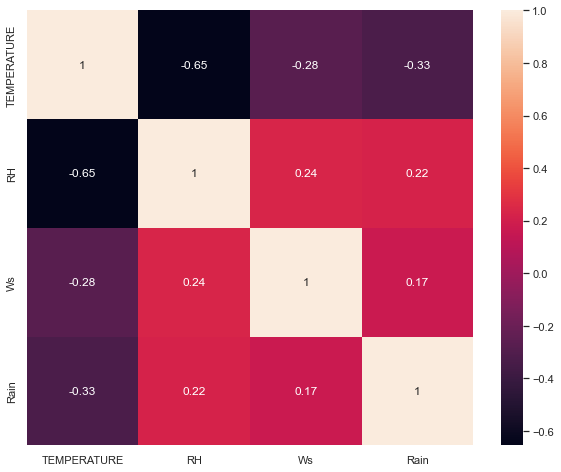

In [53]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(adf.corr(), annot=True)

<AxesSubplot:xlabel='TEMPERATURE', ylabel='RH'>

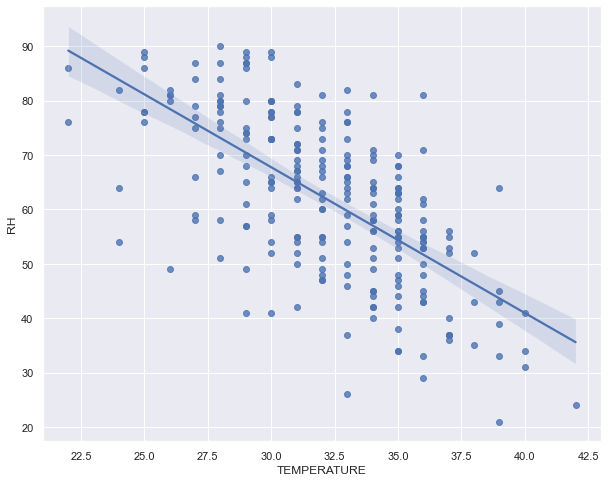

In [60]:
sns.regplot(x='TEMPERATURE', y='RH', data=adf)

<AxesSubplot:xlabel='TEMPERATURE', ylabel='Rain'>

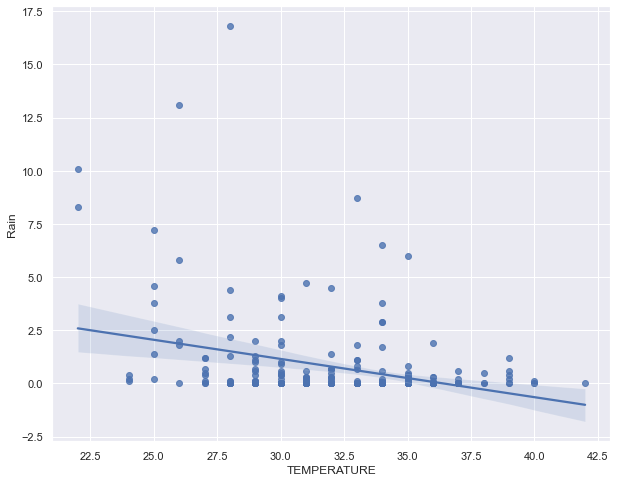

In [57]:
sns.regplot(x='TEMPERATURE', y='Rain', data=adf)

<AxesSubplot:xlabel='Ws', ylabel='RH'>

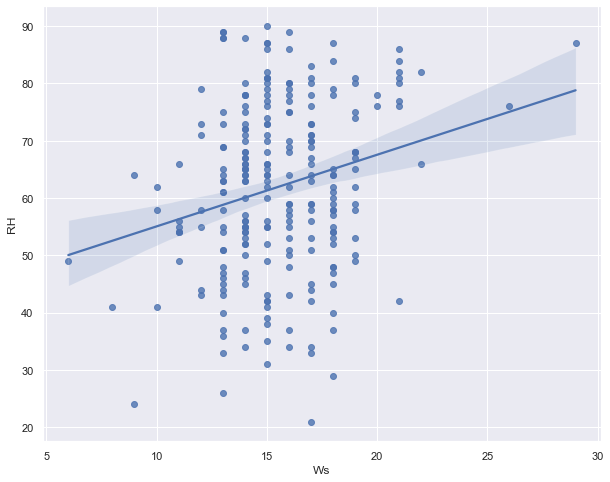

In [64]:
sns.regplot(x='Ws', y='RH', data=adf)

#  Independent and dependent Features

In [76]:
# rearrange the columns in the dataframe
adf = adf[['TEMPERATURE','Ws', "Rain", 'RH']]

In [77]:
x = adf.iloc[:,:-1]
y = adf.iloc[:,-1]

In [78]:
x # Indeoendant data

,TEMPERATURE,Ws,Rain
0,29,18,0.0
1,29,13,1.3
2,26,22,13.1
3,25,13,2.5
4,27,16,0.0
...,...,...,...
241,30,14,0.0
242,28,15,4.4
243,27,29,0.5
244,24,18,0.1


In [79]:
y # Deoendant data

0      57
1      61
2      82
3      89
4      77
       ..
241    65
242    87
243    87
244    54
245    64
Name: RH, Length: 244, dtype: int32

In [80]:
from sklearn.model_selection import train_test_split

In [103]:
x_train, x_test, y_train, y_test = train_test_split(
    x,y,test_size=0.33, random_state=20)

In [108]:
x_train_c, x_test_c, y_train_c, y_test_c =x_train, x_test, y_train, y_test # copy for the use later

# Algorithms

# Standardize the dataset

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [110]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

#  Model Training

# Linear Regression

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
reg_linear = LinearRegression()
reg_linear

LinearRegression()

In [113]:
reg_linear.fit(x_train, y_train)

LinearRegression()

In [114]:
## Print the coefficient and the intercept
print(reg_linear.coef_)

[-10.73741524  -1.58673896  -0.02207383]


In [115]:
## Print the coefficient and the intercept
print(reg_linear.intercept_)

61.88957055214724


In [116]:
## Prediction for the test data
reg_pred_linear = reg_linear.predict(x_test)
reg_pred_linear

array([55.96838558, 53.36087012, 50.29874202, 58.48034326, 51.8516151 ,
       48.28917587, 84.91835128, 73.27506959, 62.09264179, 65.65196041,
       86.53980733, 70.72885568, 49.29395894, 63.04964597, 53.86014105,
       50.80113355, 63.04652536, 65.10699101, 59.48512633, 55.41821515,
       68.67151065, 49.29395894, 72.78620071, 64.05442905, 53.86014105,
       44.67167632, 55.90292322, 51.35130398, 59.47368409, 47.23661391,
       64.09908732, 70.31682089, 62.50044524, 86.53772693, 74.24760633,
       68.15871707, 83.96758831, 57.96650948, 62.53997301, 65.60938254,
       64.10116773, 72.22250763, 55.92060669, 67.11655715, 70.22542394,
       72.76331622, 45.22704776, 64.10220793, 62.54725444, 71.10427178,
       66.15539215, 54.41343208, 73.78994358, 50.80009335, 55.36835586,
       79.89651632, 51.84537388, 69.72407261, 54.36149238, 74.74694777,
       65.60938254, 63.54475608, 50.84891244, 53.35774951, 57.97795172,
       55.41821515, 65.13604621, 71.73363875, 47.78678433, 56.92

Text(0, 0.5, 'Test predicted data')

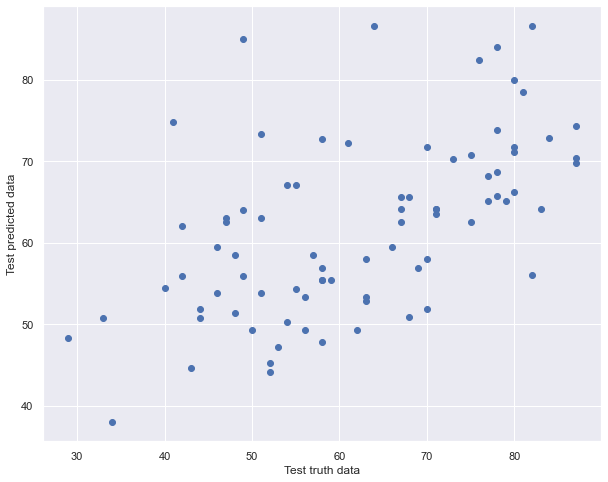

In [117]:
plt.scatter(y_test,reg_pred_linear)
plt.xlabel("Test truth data")
plt.ylabel("Test predicted data")

In [118]:
residuel_linear = y_test-reg_pred_linear
residuel_linear

87     26.031614
238     2.639130
211     3.701258
155   -10.480343
130    -7.851615
         ...    
126     8.287165
112   -12.116557
235     1.076691
176     6.897792
11      2.591935
Name: RH, Length: 81, dtype: float64

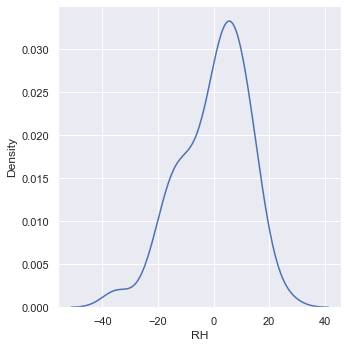

In [119]:
sns.displot(residuel_linear, kind='kde')

<AxesSubplot:ylabel='RH'>

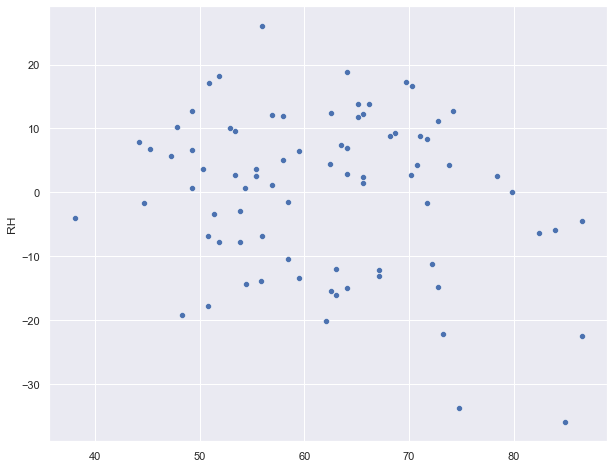

In [120]:
# scatter plot with prediction and residuel
# Uniformdistribution
sns.scatterplot(x = reg_pred_linear, y=residuel_linear)

# Performance Matrix

In [121]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,reg_pred_linear))
print(mean_absolute_error(y_test, reg_pred_linear))
print(np.sqrt(mean_squared_error(y_test,reg_pred_linear)))

9.908656796188971
9.908656796188971
12.207893074406265


# Ridge Regression

* Different cases for tuning values of lambda.

* **If lambda is set to be 0, Ridge Regression equals Linear Regression**
* **If lambda is set to be infinity, all weights are shrunk to zero.**

In [122]:
from sklearn.linear_model import Ridge
regression_ridge = Ridge() # by default Alpha means Lembda is 1.0 
regression_ridge.fit(x_train, y_train)

Ridge()

In [123]:
## Print the coefficient and the intercept
print(regression_ridge.coef_)

[-1.06510972e+01 -1.54978402e+00  3.89429519e-04]


In [124]:
## Print the coefficient and the intercept
print(regression_ridge.intercept_)

61.88957055214724


In [126]:
## Prediction for the test data
reg_pred_ridge = regression_ridge.predict(x_test)
reg_pred_ridge

array([56.05086367, 53.41067666, 50.373165  , 58.50431819, 51.93864065,
       48.41040138, 84.67417593, 73.20142419, 62.125887  , 65.65418133,
       86.3326508 , 70.65436486, 49.39178319, 63.01390257, 53.90142262,
       50.8638559 , 63.01395762, 65.07003243, 59.4857    , 55.46680652,
       68.598235  , 49.39178319, 72.71049471, 63.99528438, 53.90142262,
       44.78892432, 55.9578094 , 51.44791305, 59.48590186, 47.33565333,
       64.08870567, 70.35049819, 62.52403748, 86.3326875 , 74.18337489,
       68.10772761, 83.78605025, 58.01382915, 62.52334012, 65.56072333,
       64.08866897, 72.12667614, 55.95749743, 67.03279605, 70.1636923 ,
       72.71089845, 45.37288971, 64.08865062, 62.52321166, 71.24150504,
       66.14485388, 54.48542471, 73.69189487, 50.86387425, 55.37347699,
       79.76723018, 51.93875076, 69.67298305, 54.39213188, 74.57991044,
       65.56072333, 63.50472193, 50.95722214, 53.41073172, 58.01362728,
       55.46680652, 65.16372899, 71.63574667, 47.91971047, 56.93

Text(0, 0.5, 'Test predicted data')

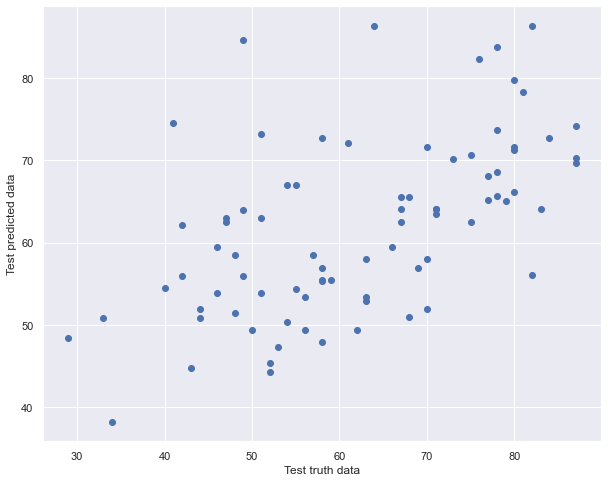

In [127]:
plt.scatter(y_test,reg_pred_ridge)
plt.xlabel("Test truth data")
plt.ylabel("Test predicted data")

In [132]:
residuel_ridge = y_test-reg_pred_ridge
residuel_ridge

87     25.949136
238     2.589323
211     3.626835
155   -10.504318
130    -7.938641
         ...    
126     8.363886
112   -12.032796
235     1.061084
176     6.911349
11      2.705173
Name: RH, Length: 81, dtype: float64

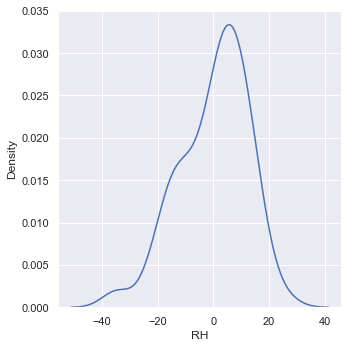

In [133]:
sns.displot(residuel_ridge, kind='kde')

<AxesSubplot:ylabel='RH'>

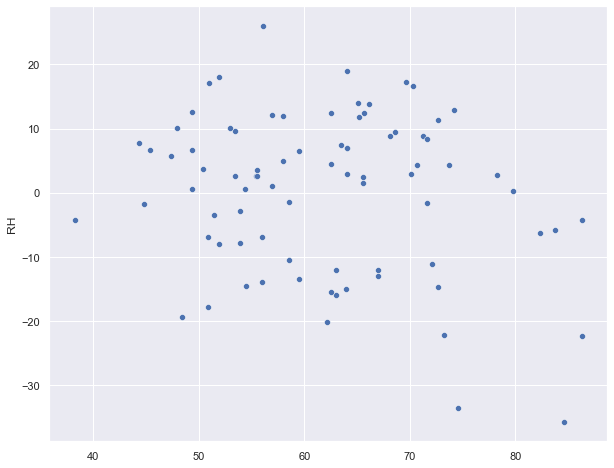

In [134]:
# scatter plot with prediction and residuel
# Uniformdistribution
sns.scatterplot(x = reg_pred_ridge, y=residuel_ridge)

In [135]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,reg_pred_ridge))
print(mean_absolute_error(y_test, reg_pred_ridge))
print(np.sqrt(mean_squared_error(y_test,reg_pred_ridge)))

9.892357077047734
9.892357077047734
12.1786553828966


# Lasso Regression

In [136]:
from sklearn.linear_model import Lasso
regression_lasso = Lasso()
regression_lasso.fit(x_train, y_train)

Lasso()

In [137]:
## Print the coefficient and the intercept
print(regression_lasso.coef_)

[-9.15890789 -0.0165702   0.        ]


* **From above we can clearly observe that Lasso regression is very much useful in feature selection**

In [138]:
## Print the coefficient and the intercept
print(regression_lasso.intercept_)

61.88957055214724


In [139]:
## Prediction for the test data
reg_pred_lasso = regression_lasso.predict(x_test)
reg_pred_lasso

array([59.18396605, 53.99676177, 51.3847971 , 59.21019824, 53.98102246,
       51.36381135, 77.5464153 , 72.26477515, 64.40789539, 67.0251065 ,
       82.72312671, 69.65805692, 51.37430423, 61.83790222, 54.00200821,
       51.39004354, 61.83790222, 64.43937402, 59.22069111, 56.59823357,
       67.05658513, 51.37430423, 72.25952872, 61.8483951 , 54.00200821,
       46.1661142 , 56.60348001, 53.97577602, 59.22069111, 48.77283243,
       64.42888114, 74.81378258, 61.83265578, 82.72312671, 72.27526803,
       67.05133869, 80.11640848, 59.2049518 , 61.83265578, 64.44462045,
       64.42888114, 69.67379623, 56.60348001, 64.46035977, 69.65281048,
       72.25952872, 48.75184668, 64.42888114, 61.83265578, 72.2437894 ,
       67.03035294, 56.58774069, 72.27002159, 51.39004354, 54.01774752,
       77.49395093, 53.98102246, 69.64756405, 54.00725465, 69.70002842,
       64.44462045, 61.84314866, 53.97052959, 53.99676177, 59.2049518 ,
       56.59823357, 67.01986006, 69.6685498 , 51.35856492, 56.61

Text(0, 0.5, 'Test predicted data')

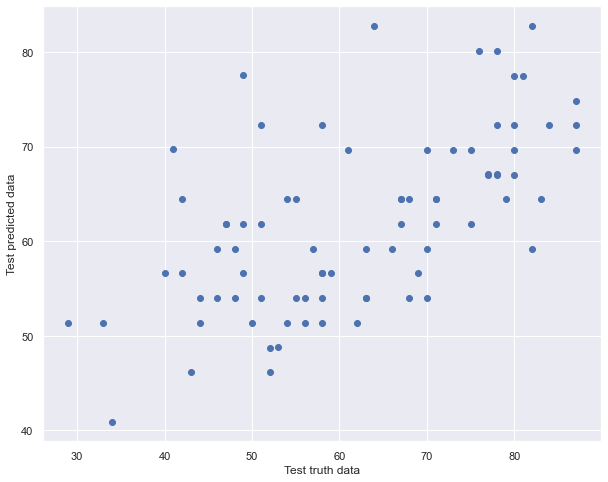

In [140]:
plt.scatter(y_test,reg_pred_lasso)
plt.xlabel("Test truth data")
plt.ylabel("Test predicted data")

In [141]:
residuel_lasso = y_test-reg_pred_lasso
residuel_lasso

87     22.816034
238     2.003238
211     2.615203
155   -11.210198
130    -9.981022
         ...    
126    10.331450
112    -9.460360
235     1.386027
176     6.571119
11      3.521788
Name: RH, Length: 81, dtype: float64

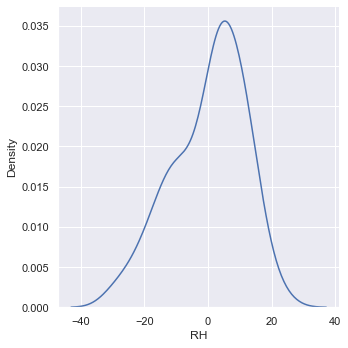

In [142]:
sns.displot(residuel_lasso, kind='kde')

<AxesSubplot:ylabel='RH'>

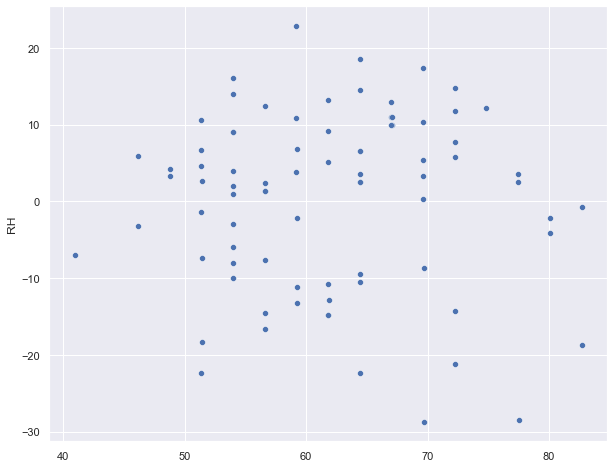

In [143]:
# scatter plot with prediction and residuel
# Uniformdistribution
sns.scatterplot(x = reg_pred_lasso, y=residuel_lasso)

In [144]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,reg_pred_lasso))
print(mean_absolute_error(y_test, reg_pred_lasso))
print(np.sqrt(mean_squared_error(y_test,reg_pred_lasso)))

9.402064105571453
9.402064105571453
11.410243157631955


# Putting together the coefficint and their corresponding variable names

# Linear Regression

In [147]:
Coefficient_df_Linear = pd.DataFrame()
Coefficient_df_Linear["Column_Name"]= x_train_c.columns
Coefficient_df_Linear["Coefficient_value"]= pd.Series(reg_linear.coef_)
print(Coefficient_df_Linear.head())

   Column_Name  Coefficient_value
0  TEMPERATURE         -10.737415
1           Ws          -1.586739
2         Rain          -0.022074


<BarContainer object of 3 artists>

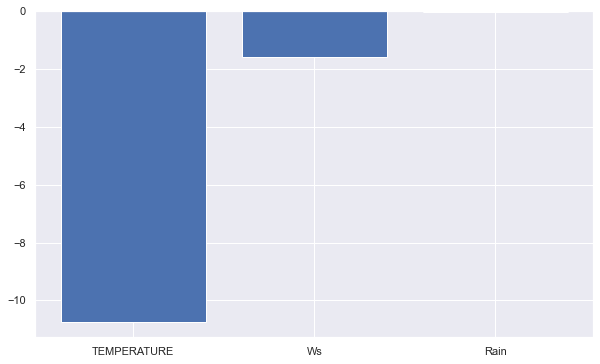

In [149]:
plt.rcParams['figure.figsize'] = (10,6)

plt.bar(Coefficient_df_Linear['Column_Name'],Coefficient_df_Linear["Coefficient_value"])

# Ridge Regression

In [151]:
Coefficient_df_ridge = pd.DataFrame()
Coefficient_df_ridge["Column_Name"]= x_train_c.columns
Coefficient_df_ridge["Coefficient_value"]= pd.Series(regression_ridge.coef_)
print(Coefficient_df_ridge.head())

   Column_Name  Coefficient_value
0  TEMPERATURE         -10.651097
1           Ws          -1.549784
2         Rain           0.000389


<BarContainer object of 3 artists>

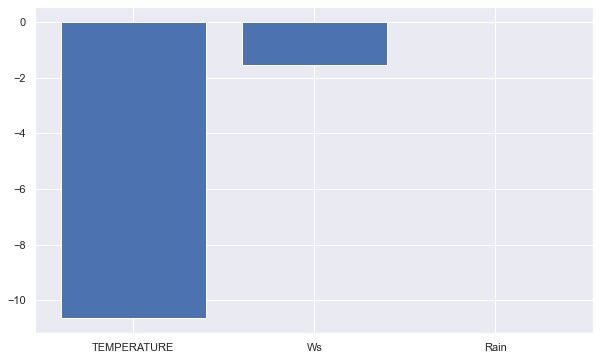

In [152]:
plt.rcParams['figure.figsize'] = (10,6)

plt.bar(Coefficient_df_ridge['Column_Name'],Coefficient_df_ridge["Coefficient_value"])

# Lasso Regression

In [154]:
Coefficient_df_lasso = pd.DataFrame()
Coefficient_df_lasso["Column_Name"]= x_train_c.columns
Coefficient_df_lasso["Coefficient_value"]= pd.Series(regression_lasso.coef_)
print(Coefficient_df_lasso.head())

   Column_Name  Coefficient_value
0  TEMPERATURE          -9.158908
1           Ws          -0.016570
2         Rain           0.000000


<BarContainer object of 3 artists>

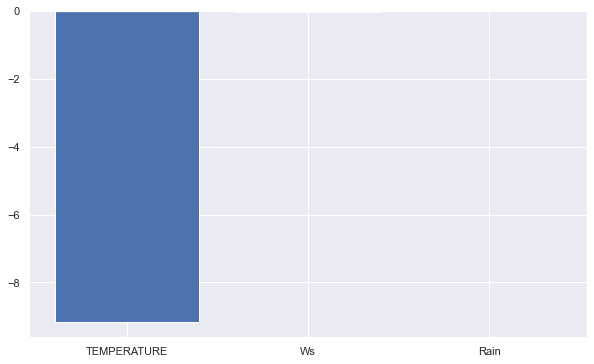

In [155]:
plt.rcParams['figure.figsize'] = (10,6)

plt.bar(Coefficient_df_lasso['Column_Name'],Coefficient_df_lasso["Coefficient_value"])

* **Comparision of graph show that how effective lasso regression is for feature selection**

**Thank You**